<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

setup cell

In [18]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

Load data

In [19]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-1578516001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


	می‌خواهیم بررسی کنیم خانه‌هایی که دارای بالکن، آسانسور، نگهبان، باربیکیو و استخر هستند عمدتا در کدام مناطق قرار دارند. با نمودار مناسب این موضوع را نشان دهید.

Miss Values

In [20]:
cols= [
    'has_balcony',
    'has_elevator',
    'has_security_guard',
    'has_barbecue',
    'has_pool',
    'location_latitude',
    'location_longitude',
    'neighborhood_slug',
    'city_slug'
]


nan_count = df[cols].isna().sum()


nan_percent = (nan_count / len(df) * 100)


result = pd.DataFrame({
    'nan_count': nan_count,
    'nan_percent': nan_percent
})

print(result)


                    nan_count  nan_percent
has_balcony            493589      49.3589
has_elevator           458251      45.8251
has_security_guard     968688      96.8688
has_barbecue           968802      96.8802
has_pool               970610      97.0610
location_latitude      344392      34.4392
location_longitude     344392      34.4392
neighborhood_slug      562861      56.2861
city_slug                   2       0.0002


In [21]:
cols_check = [
    'has_balcony',
    'has_elevator',
    'has_security_guard',
    'has_barbecue',
    'has_pool',

]

for col in cols_check:
    unique_vals = df[col].dropna().unique()
    print(f"{col}")
    print(f"Type: {df[col].dtype}")
    print(f"Unique count : {len(unique_vals)}")
    print(f"Unique values sample: {unique_vals[:10]}")


has_balcony
Type: object
Unique count : 5
Unique values sample: ['true' 'false' 'unselect' True False]
has_elevator
Type: object
Unique count : 2
Unique values sample: [True False]
has_security_guard
Type: object
Unique count : 2
Unique values sample: [False True]
has_barbecue
Type: object
Unique count : 2
Unique values sample: [False True]
has_pool
Type: object
Unique count : 2
Unique values sample: [False True]


In [22]:
def to_bool(val):
    val_str = str(val).strip().lower()
    if val_str == 'true':
        return True
    elif val_str == 'false':
        return False
    elif val_str == 'unselect' or val_str == 'nan' or val is None:
        return False
    else:
        return bool(val)

cols2 = ['has_balcony', 'has_elevator', 'has_security_guard', 'has_barbecue', 'has_pool']
for col in cols2:
    df[col] = df[col].apply(to_bool)


In [23]:
cols_check = [
    'has_balcony',
    'has_elevator',
    'has_security_guard',
    'has_barbecue',
    'has_pool',

]

for col in cols_check:
    unique_vals = df[col].dropna().unique()
    print(f"{col}")
    print(f"Type: {df[col].dtype}")
    print(f"Unique count : {len(unique_vals)}")
    print(f"Unique values sample: {unique_vals[:10]}")

has_balcony
Type: bool
Unique count : 2
Unique values sample: [False  True]
has_elevator
Type: bool
Unique count : 2
Unique values sample: [False  True]
has_security_guard
Type: bool
Unique count : 2
Unique values sample: [False  True]
has_barbecue
Type: bool
Unique count : 2
Unique values sample: [False  True]
has_pool
Type: bool
Unique count : 2
Unique values sample: [False  True]


In [24]:
lu_cols = ['has_balcony', 'has_elevator', 'has_security_guard', 'has_barbecue', 'has_pool']


all_lu = df[df[lu_cols].all(axis=1)]
print({len(all_lu)})


{0}


In [25]:
any_lu= df[df[lu_cols].any(axis=1)]
print(f"تعداد خانه‌های دارای حداقل یک امکان: {len(any_lu)}")


تعداد خانه‌های دارای حداقل یک امکان: 569684


In [26]:
at_least_2 = df[df[lu_cols].sum(axis=1) >= 2]
print(len(at_least_2))


219691


full location

In [27]:
df['neighborhood_slug'] = df['neighborhood_slug'].fillna('')

df['city_neighborhood'] = df['city_slug'] + df['neighborhood_slug']

print(df[['city_slug', 'neighborhood_slug', 'city_neighborhood']].head())

  city_slug neighborhood_slug city_neighborhood
0     karaj         mehrshahr    karajmehrshahr
1    tehran           gholhak     tehrangholhak
2    tehran             tohid       tehrantohid
3    tehran          elahiyeh    tehranelahiyeh
4   mashhad          emamreza   mashhademamreza


has_elevator

/tmp/ipython-input-3997838971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


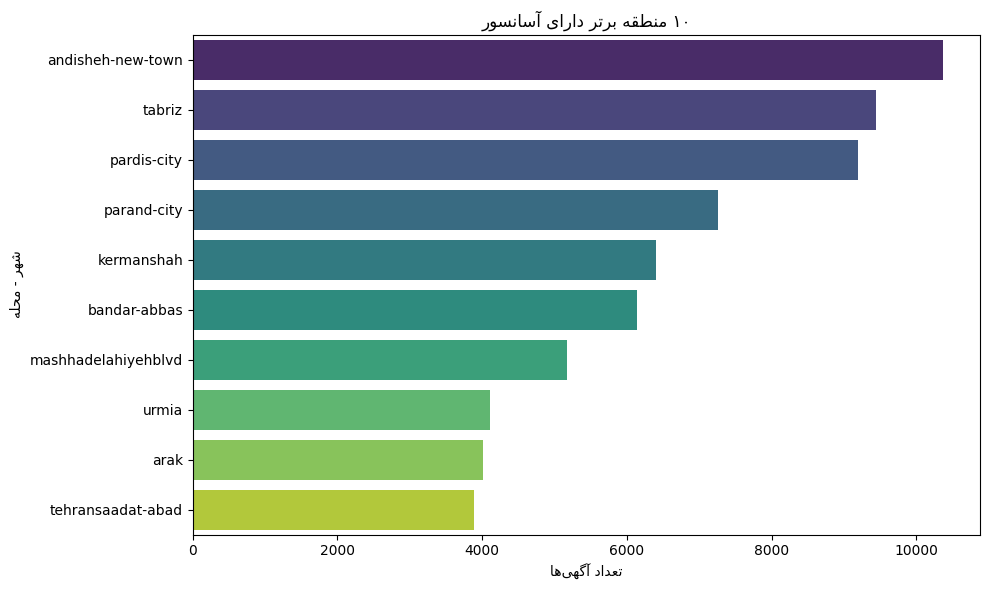

In [28]:
feature_df = df[df['has_elevator'] == True]
counts = feature_df['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای آسانسور"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()


has_balcony

/tmp/ipython-input-2361871275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


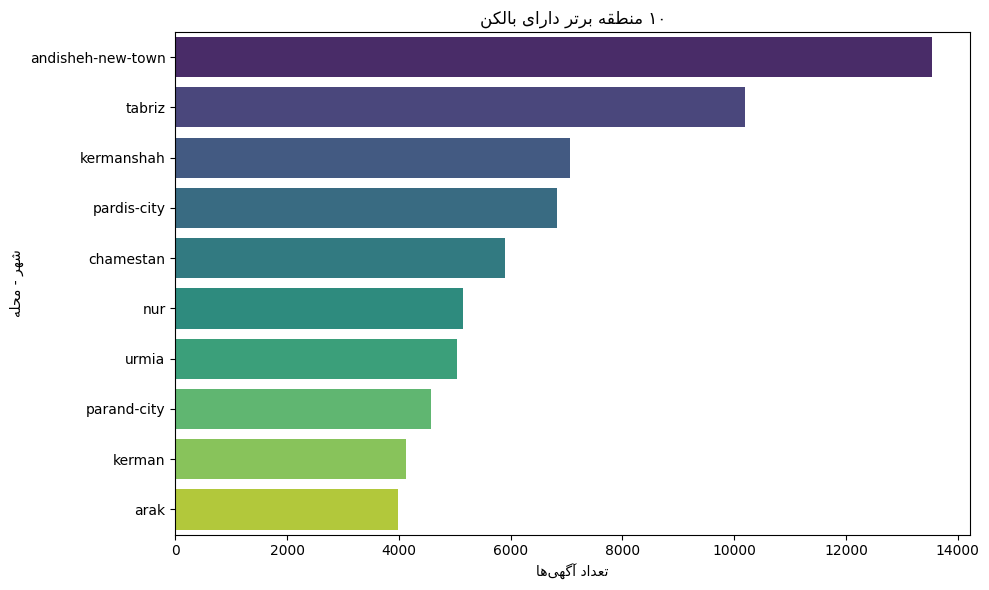

In [29]:
feature_df = df[df['has_balcony'] == True]
counts = feature_df['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای بالکن"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()


has_security_guard

/tmp/ipython-input-2360880726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


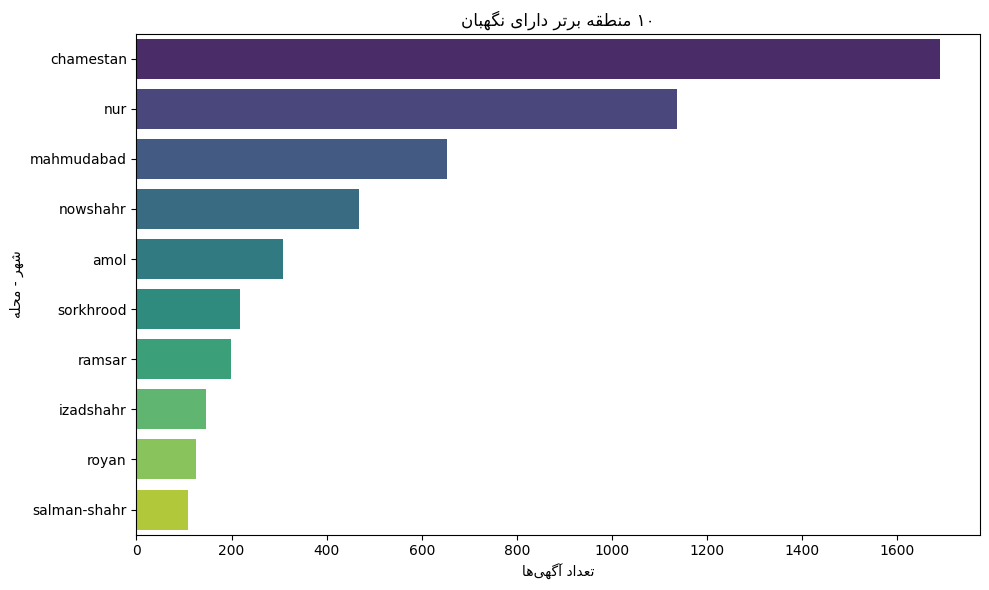

In [30]:
feature_df = df[df['has_security_guard'] == True]
counts = feature_df['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای نگهبان"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()


has_barbecue

/tmp/ipython-input-1519574260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


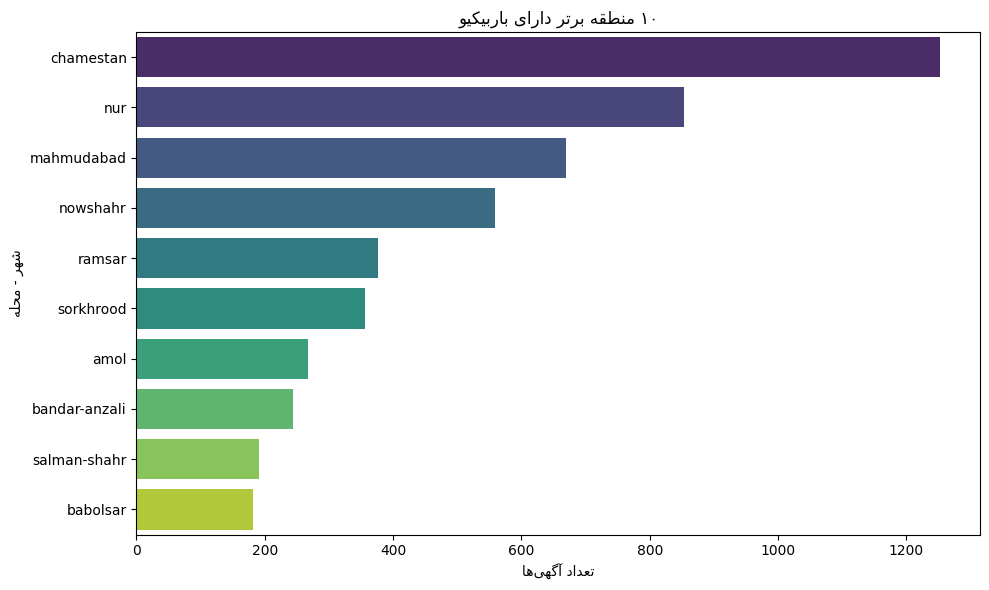

In [31]:
feature_df = df[df['has_barbecue'] == True]
counts = feature_df['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای باربیکیو"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()


has_pool

/tmp/ipython-input-3458705280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


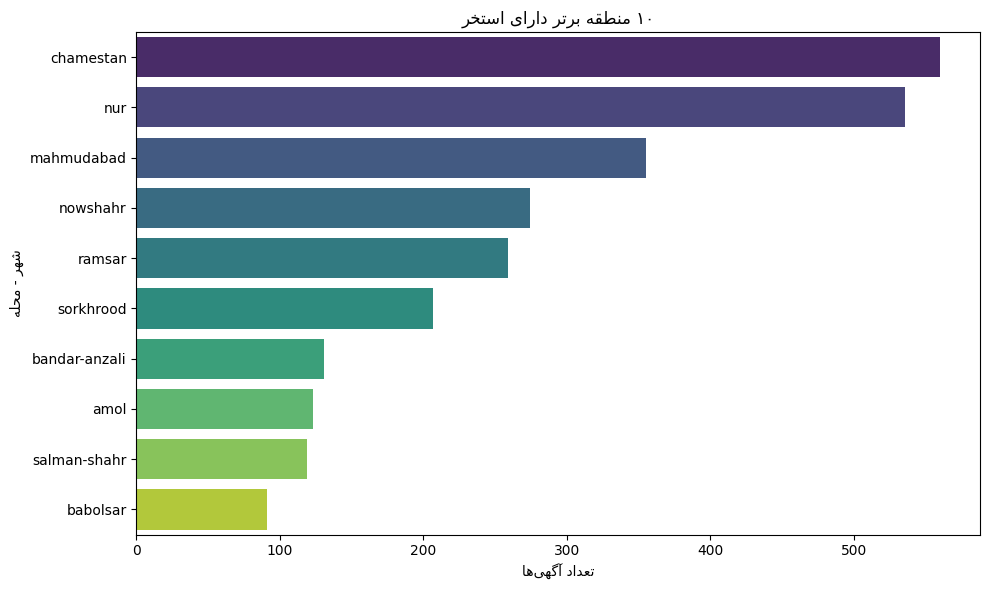

In [32]:
feature_df = df[df['has_pool'] == True]
counts = feature_df['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای استخر"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()


/tmp/ipython-input-2800143963.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')


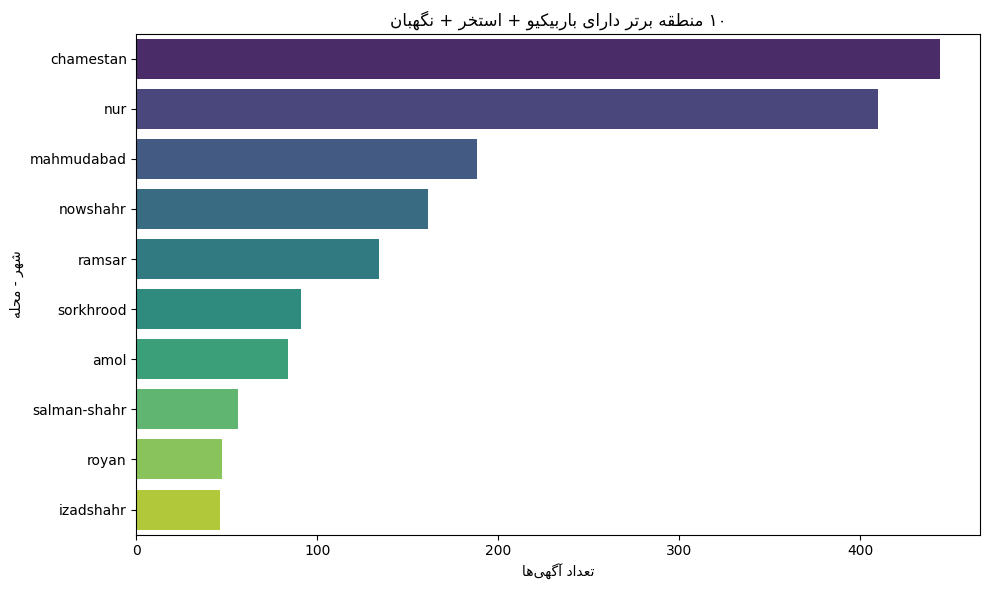

In [37]:
cols = ['has_barbecue', 'has_pool', 'has_security_guard']
bps = df[df[cols].all(axis=1)]

counts = bps['city_neighborhood'].value_counts().head(10).reset_index()
counts.columns = ['city_neighborhood', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='count', y='city_neighborhood', palette='viridis')
plt.title(fa_label("۱۰ منطقه برتر دارای باربیکیو + استخر + نگهبان"))
plt.xlabel(fa_label("تعداد آگهی‌ها"))
plt.ylabel(fa_label("شهر - محله"))
plt.tight_layout()
plt.show()
